# Import packages

In [4]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/yanza15/software/Compos_new/sources')
from compos import compos
%matplotlib inline

# Transfer Function

In [5]:
reload(compos)
compos_tf = compos.cosmology(omb=0.1)
tf = compos.transfunction(compos_tf)
k = np.linspace(-3, 2)
k = 10 ** k
k = k * tf.h
t = tf.transfunction(k)

ob = tf.omega_b
o0 = tf.omega_0

## CDM+baryon

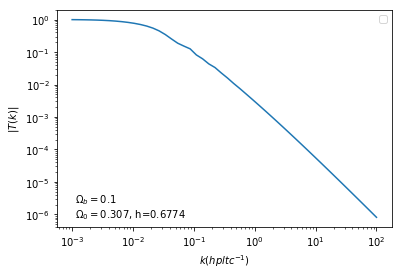

In [6]:

plt.loglog(k/tf.h, np.abs(t))
# plt.ylim(0.001, 10)

pl = plt.xlim()[0] * 2
pd = plt.ylim()[0] * 2
pu = plt.ylim()[0] * 6

plt.xlabel(r'$k(h pltc^{-1}$)')
plt.ylabel(r'$|T(k)|$')
plt.text(pl, pu, '$\Omega_b=$'+str(ob))
plt.text(pl, pd, '$\Omega_0=$'+str(o0)+', h='+str(tf.h))
plt.legend(fontsize=10)

## CDM only 

Text(0.5,0,'k (h Mpc$^{-1}$)')

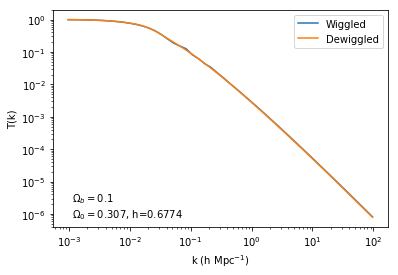

In [7]:
t_nowiggle = tf.t_nowiggle(k)

plt.loglog(k / 0.7, t, label='Wiggled')
plt.loglog(k / 0.7, t_nowiggle, label='Dewiggled')
plt.legend()
plottextl = plt.xlim()[0] * 2
plottextd = plt.ylim()[0] * 2
plt.text(pl, pu, '$\Omega_b=$'+str(ob))
plt.text(pl, pd, '$\Omega_0=$'+str(o0)+', h='+str(tf.h))
plt.ylabel('T(k)')
plt.xlabel('k (h Mpc$^{-1}$)')


## Baryon only

(0.0001, 7.605327858141788)

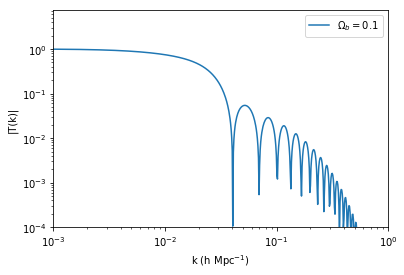

In [8]:
k = np.linspace(-3, 2, 1000)
k = 10 ** k
k = k * tf.h

t_baryon = tf.Tbaryon(k)

plt.loglog(k / 0.7, abs(t_baryon), label=r'$\Omega_b=$'+str(tf.omega_b))
plt.legend()
plottextl = plt.xlim()[0] * 2
plottextd = plt.ylim()[0] * 2
plt.ylabel('|T(k)|')
plt.xlabel('k (h Mpc$^{-1}$)')
plt.xlim(1e-3,1)
plt.ylim(1e-4)

# Matter Power Spectrum

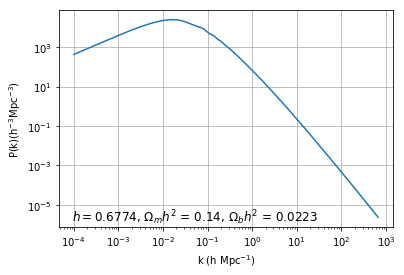

In [9]:
reload(compos)
cosmo_mps = compos.cosmology()
mps = compos.matterps(cosmo_mps)

k = np.linspace(-4, np.log10(6.71600e+02), 10000)
k = 10 ** k * mps.h
p = mps.normalizedmp(k)

# p_nw = matterps.normalizedmpnw(k)

plt.loglog(k / mps.h, p * mps.h ** 3)
plottextl = plt.xlim()[0] * 2
plottextd = plt.ylim()[0] * 2
plt.text(plottextl, plottextd, r'$h = $' + str(mps.h) +
        ', $\Omega_mh^2$ = '+str(round(mps.omega_0 *
                                       mps.h ** 2,2)) +
        ', $\Omega_bh^2$ = '+str(round(mps.omega_b *
                                       mps.h ** 2,4)), fontsize=12)
plt.ylabel('P(k)(h$^{-3}$Mpc$^{-3}$)')
plt.xlabel('k (h Mpc$^{-1}$)')
plt.grid()


The program lasts 5.58689212799 seconds


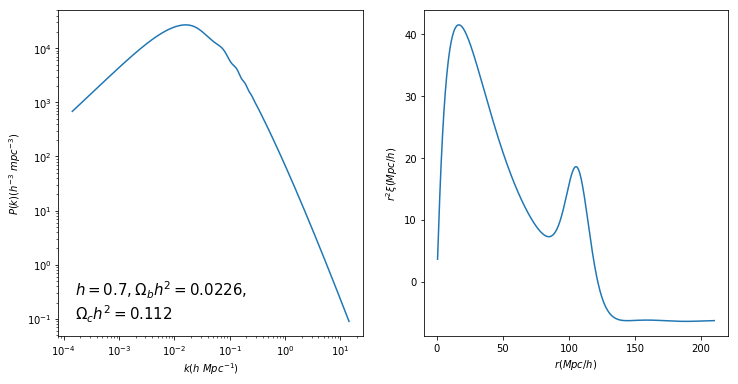

In [10]:
import time
t0 = time.time()
r = np.linspace(1, 300, 1000)
xi = mps.twopcf(r)

k = np.linspace(-4, 1, 10000)
k = 10 ** k
p = mps.normalizedmp(k)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.loglog(k / 0.7, p * 0.7 ** 3)
plottextl = plt.xlim()[0] * 2
plottextd = plt.ylim()[0] * 2
plt.text(plottextl, plottextd,
        r'$h = 0.7, \Omega_bh^2 = 0.0226,$' +'\n'+ r'$\Omega_ch^2 = 0.112$', fontsize=15)
plt.ylabel('$P(k)(h^{-3}$ $mpc^{-3}$)')
plt.xlabel('$k(h$ $Mpc^{-1}$)')

plt.subplot(122)
plt.plot(r * 0.7, xi * (r * 0.7) ** 2)
plt.xlabel('$r(Mpc/h)$')
plt.ylabel(r'$r^2\xi (Mpc/h)$')
t1 = time.time()
print 'The program lasts ' + str(t1 - t0) + ' seconds'


# Growth Factor

This part reproduces Figure.1 in arxiv:0305286. It may take a long time to run,
so you might just comment it out.

In [11]:


from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import sys
# the mock-0.3.1 dir contains testcase.py, testutils.py & mock.py
sys.path.append('/home/yanza15/software/Compos_new/sources')
import compos_new as compos
%matplotlib inline
cosmo1 = compos.cosmology(om0=0.3, omb=0.0001, H0=70, omq=0.7, sigma8=0.8288)
mps1 = compos.matterps(cosmo1)
a = np.linspace(0.0001, 1, 50)

g1 = np.zeros(np.size(a))
for i in range(0, np.size(g1)):
    g1[i] = mps1.growfunc_a(a[i])

cosmo2 = compos.cosmology(om0=0.3, omb=0.0001, H0=70, omq=0.7, sigma8=0.8288,
                           w_0=-0.8, w_1=0)
mps2 = compos.matterps(cosmo2)

g2 = np.zeros(np.size(a))
for i in range(0, np.size(g2)):
    g2[i] = mps2.growfunc_a(a[i])

cosmo3 = compos.cosmology(om0=0.3, omb=0.0001, H0=70, omq=0.7, sigma8=0.8288, 
                          w_0=-0.8, w_1=-0.6)
mps3 = compos.matterps(cosmo3)

g3 = np.zeros(np.size(a))
for i in range(0, np.size(g3)):
    g3[i] = mps3.growfunc_a(a[i])

cosmo4 = compos.cosmology(om0=0.3, omb=0.0001, H0=70, omq=0.7, sigma8=0.8288, 
                          w_0=-0.8, w_1=0.6)
mps4 = compos.matterps(cosmo4)

g4 = np.zeros(np.size(a))
for i in range(0, np.size(g4)):
    g4[i] = mps4.growfunc_a(a[i])

ImportError: No module named compos_new

In [ ]:
plt.figure(figsize=[10, 5])
plt.subplot(122)
plt.plot(a[3:], g1[3:]/a[3:]/g1[-1], label='$w_0 = -1, w_1 = 0$')
plt.plot(a[3:], g2[3:]/a[3:]/g2[-1], label='$w_0 = -0.8, w_1 = 0$')
plt.plot(a[3:], g3[3:]/a[3:]/g3[-1], label='$w_0 = -0.8, w_1 = -0.6$')
plt.plot(a[3:], g4[3:]/a[3:]/g4[-1], label='$w_0 = -0.8, w_1 = 0.6$')
plt.xlabel('a')
plt.ylabel('Growth$(\delta/a)/(\delta/a)_{z = 0}$', fontsize='small')
plt.legend(fontsize='small')

plt.subplot(121)
plt.plot(a[3:], g1[3:]/a[3:]/(g1[3]/a[3]), label='$w_0 = -1, w_1 = 0$')
plt.plot(a[3:], g2[3:]/a[3:]/(g2[3]/a[3]), label='$w_0 = -0.8, w_1 = 0$')
plt.plot(a[3:], g3[3:]/a[3:]/(g3[3]/a[3]), label='$w_0 = -0.8, w_1 = -0.6$')
plt.plot(a[3:], g4[3:]/a[3:]/(g4[3]/a[3]), label='$w_0 = -0.8, w_1 = 0.6$')
plt.xlabel('a')
plt.ylabel('Growth$(\delta/a)/(\delta/a)_{a = 0}$', fontsize='small')
plt.legend(fontsize='small', loc=3)


# Pyhalofit

In [ ]:
reload(compos)
x = np.linspace(-4, 1, 1000)
k = 10 ** x

cosmo_np = compos.cosmology()
np_class = compos.halofit(cosmo_np)
np1 = np_class.nlpowerspec(k, z=0)
p1 = np_class.normalizedmp(k, z=0)
np2 = np_class.nlpowerspec(k, z=5)
p2 = np_class.normalizedmp(k, z=5)
np3 = np_class.nlpowerspec(k, z=10)
p3 = np_class.normalizedmp(k, z=10)


In [ ]:
plt.figure(figsize=[8, 6])
plt.loglog(k/np1_class.h, np1, '--', label='nonlinear, z=0', color='C0')
plt.loglog(k/np1_class.h, p1, label='linear, z=0', color='C0')
plt.loglog(k/np1_class.h, np2, '--',label='nonlinear,z=5', color='C1')
plt.loglog(k/np1_class.h, p2, label='linear,z=5', color='C1')
plt.loglog(k/np1_class.h, np3, '--',label='nonlinear,z=10', color='C2')
plt.loglog(k/np1_class.h, p3, label='linear,z=10', color='C2')

plt.legend(fontsize=10)
plt.xlabel('k (h Mpc$^{-1}$)')
plt.ylabel('P(k) (h$^{-3}$ Mpc$^{-3}$)')